In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

<Figure size 640x480 with 0 Axes>

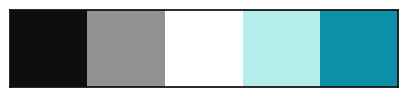

In [ ]:
palette = ["#0e0e0e",
           "#919191",
           "#FFFFFF",
           "#B5EEED",
           "#0B90A7"]

params = {
    "rc": {
        "axes.facecolor": palette[2],
        "axes.grid": False,
        "grid.color": palette[1],
        "axes.edgecolor": palette[0],
        "figure.facecolor": palette[2],
        "axes.labelcolor": palette[0],
        "xtick.color": palette[0],
        "ytick.color": palette[0],
        "legend.labelcolor": palette[0],
        "legend.edgecolor": palette[2],
        "xtick.labelsize": 14,
        "ytick.labelsize":14,
        "font.size": 18,
        "font.family":"serif",
        "font.weight": "bold",

    }
}

sns.set(**params)

sns.despine()
sns.palplot(palette)

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Melina - Aex/aex_estruturados.parquet')

df.head(2)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Melina - Aex/aex_estruturados.parquet'

In [ ]:
# Erros na sigla da unidade
df["Unidade Sigla"] = df["Unidade Sigla"].replace({
    'EACH) Os(as': 'EACH',
    'FZEA)(1': 'FZEA',
    'FM)(a': 'FM'
})

NameError: name 'df' is not defined

In [ ]:
def count_plot(df, var, figsize=(8,10)):
  counts = df[var].value_counts().reset_index()
  counts.columns = [var, "Frequência"]

  plt.figure(figsize=figsize)
  sns.barplot(data=counts, y=var, x="Frequência", palette="viridis", orient="h")

  plt.title(f"{var}", fontsize=16, fontweight="bold")
  plt.xlabel("Frequência", fontsize=14)
  plt.ylabel(var, fontsize=14)
  plt.grid(axis="x", linestyle="--", alpha=0.7)
  plt.tight_layout()
  plt.show()

In [ ]:
freq = df["Unidade Sigla"].value_counts()
media = freq.mean()
desvio = freq.std()

print("Média de AEX:", round(media, 2))
print("Desvio padrão:", round(desvio, 2))
freq

Média de AEX: 23.58
Desvio padrão: 20.84


,count
Unidade Sigla,
FD,82
ESALQ,80
ICMC,69
FFLCH,59
FFCLRP,55
FMRP,48
FCF,47
FAU,43
EE,42


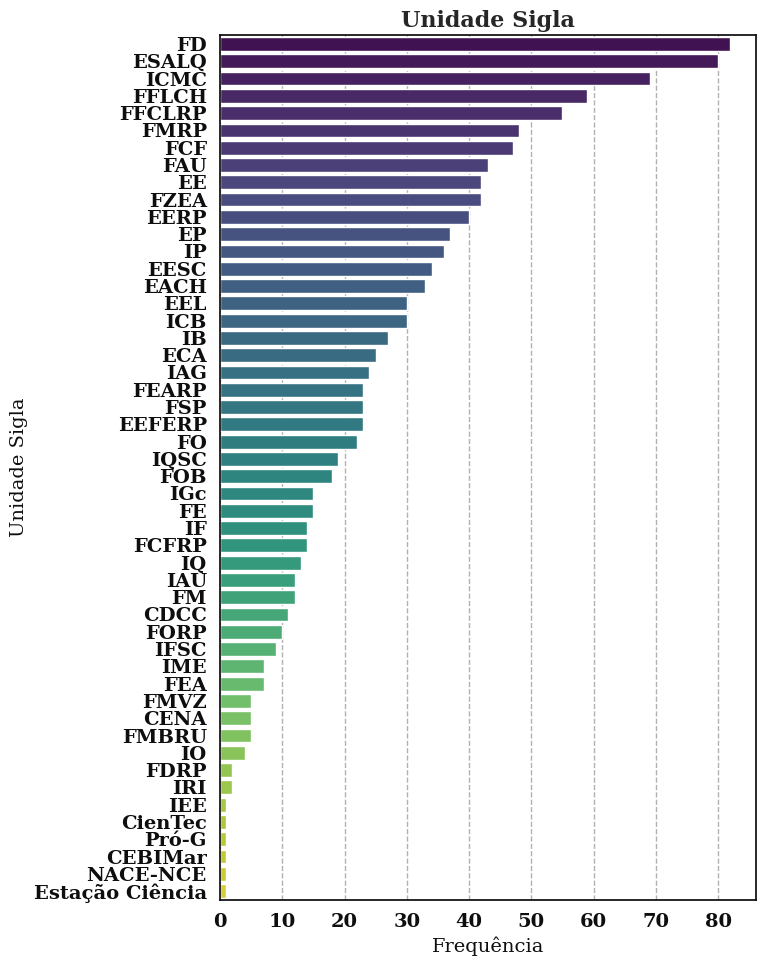

In [ ]:
count_plot(df, "Unidade Sigla")

In [ ]:
freq = df["Docente Responsável - NUSP"].value_counts()
media = freq.mean()
desvio = freq.std()

print("Média de AEX:", round(media, 2))
print("Desvio padrão:", round(desvio, 2))
freq

Média de AEX: 1.63
Desvio padrão: 1.23


,count
Docente Responsável - NUSP,
13349639,10
3083937,10
2862847,9
3518013,9
6346511,9
...,...
1304230,1
8779772,1
6433394,1


In [ ]:
# Para garantir que cada classe tenha amostras suficientes (exclui siglas com quantidades irrisórias de AEX)
freq = df['Unidade Sigla'].value_counts()
df['stratify_col'] = df['Unidade Sigla'].apply(lambda x: x if freq[x] >= 10 else 'outros')

train, test_val = train_test_split(df, test_size=0.15, stratify=df['stratify_col'], random_state=956)
test, val = train_test_split(test_val, test_size=0.20, stratify=test_val['stratify_col'], random_state=962)

train = train.drop(columns=['stratify_col'])
test = test.drop(columns=['stratify_col'])
val = val.drop(columns=['stratify_col'])

In [ ]:
test.shape[0]

141

In [ ]:
val.shape[0]

36

In [ ]:
train.shape[0] + test.shape[0] + val.shape[0] == df.shape[0]

True

In [ ]:
train.to_csv("aex_treino.csv", index=False)
val.to_csv("aex_val.csv", index=False)
test.to_csv("aex_test.csv", index=False)